In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random

In [2]:
train_url = 'NSL_KDD_Train.csv'
test_url = 'NSL_KDD_Test.csv'

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df = pd.read_csv(train_url,header=None, names = col_names)

df_test = pd.read_csv(test_url, header=None, names = col_names)

print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [4]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
print('Label distribution Training set:')
print(df['label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test['label'].value_counts())

Label distribution Training set:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label distribution Test set:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattac

In [6]:
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


In [7]:
print('Test set:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat
        
              } categories".format(col_name=col_name, unique_cat=unique_cat))


Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [9]:
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
print(unique_protocol2)

# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
print(unique_service2)


# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
print(unique_flag2)


# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2


#do it for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'ser

In [10]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)

print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())

# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
--------------------
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [11]:
enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)


# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Identify unique 'service' values in training and test sets
trainservice = set(df)
testservice = set(df_test)

# Find the differences
difference = list(trainservice - testservice)

# Prepend 'service_' to the differing values
# string = 'service_'
# difference = [string + x for x in difference]

# Add missing columns to the test data and initialize them with 0
for col in difference:
    df_test[col] = 0

df.drop(['flag', 'protocol_type', 'service'], axis=1, inplace=True)
df_test.drop(['flag', 'protocol_type', 'service'], axis=1, inplace=True)

print(df.shape)
print(df_test.shape)
print(df.columns)
print(df_test.columns)

(125973, 39)
(22544, 39)
Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')
Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell'

In [13]:


labeldf=df['label']
labeldf_test=df_test['label']


# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})



# put the new label column back
df['label'] = newlabeldf
df_test['label'] = newlabeldf_test

In [14]:
# Define labels to be dropped
to_drop_labels = [0, 1, 2, 3, 4]

# Filter out rows with labels to be dropped
filtered_df = df[df['label'].isin(to_drop_labels)]
filtered_df_test = df_test[df_test['label'].isin(to_drop_labels)]

print('Train:')
print('Dimensions of filtered data:', filtered_df.shape)
print()
print('Test:')
print('Dimensions of filtered test data:', filtered_df_test.shape)


Train:
Dimensions of filtered data: (125973, 39)

Test:
Dimensions of filtered test data: (22544, 39)


In [16]:
X = filtered_df.drop('label', axis=1)
Y = filtered_df.label

X_test = filtered_df_test.drop('label', axis=1)
Y_test = filtered_df_test.label

In [17]:
colNames=list(X)
colNames_test=list(X_test)

In [18]:
from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler().fit(X)
X=scaler1.transform(X)

scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test=scaler2.transform(X_test)

In [19]:
print(X.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [20]:
from sklearn.feature_selection import SelectPercentile, f_classif
import numpy as np

# Assuming X is your feature matrix and Y is your target vector

# Create a SelectPercentile object with f_classif scoring function and percentile=50
selector = SelectPercentile(f_classif, percentile=50)

# Fit the selector to your data and transform X to select the top percentile of features
X_new = selector.fit_transform(X, Y)

# Get the ANOVA scores associated with each feature
anova_scores = selector.scores_

# Print the shape of the transformed feature matrix
print("Shape of transformed feature matrix (after feature selection):", X_new.shape)

# Print the ANOVA scores
print("ANOVA scores for each feature:", anova_scores)

# Get the indices of selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_feature_names = [colNames[i] for i in selected_feature_indices]

# Print the names of selected features
print("Selected feature names:", selected_feature_names)


Shape of transformed feature matrix (after feature selection): (125973, 19)
ANOVA scores for each feature: [1.63216657e+03 1.14527406e+01 5.26988211e+00 3.55455220e+00
 4.45748761e+02 3.42019637e+01 4.13719711e+03 3.84845525e+02
 3.19592485e+04 3.31110190e+00 2.64747538e+03 1.59991802e+01
 4.14961849e+00 5.00184623e+01 4.96449419e+02 4.54620524e+01
            nan 2.17648989e-01 2.88233829e+03 2.14284531e+04
 2.42274507e+02 5.14262570e+04 5.11639306e+04 4.48742744e+03
 4.54649054e+03 6.80193230e+04 4.56927417e+03 3.86846091e+03
 9.43292409e+03 3.46238796e+04 3.41042427e+04 1.31026399e+04
 1.37786510e+04 8.17589987e+03 5.21218091e+04 5.30773440e+04
 3.81965256e+03 4.58499256e+03]
Selected feature names: ['hot', 'logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_s

C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [21]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=10,n_jobs=2)
rfe = RFE(estimator=clf, n_features_to_select=20, step=1)

rfe.fit(X, Y.astype(int))
X_new=rfe.transform(X)
true=rfe.support_
colindex2=[i for i, x in enumerate(true) if x]
colname2=list(colNames[i] for i in colindex2)
colname2

['src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'num_compromised',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Scale the input features to ensure they are non-negative
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
selector_chi2 = SelectKBest(chi2, k=20)

X_new_chi2 = selector_chi2.fit_transform(X_new, Y)
colindex3 = selector_chi2.get_support(indices=True)
colname3 = [colNames[i] for i in colindex3]
colname3

['logged_in',
 'root_shell',
 'is_guest_login',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [23]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Create a SelectKBest instance with mutual information
selector_mi = SelectKBest(mutual_info_regression, k=20)  # Select the top 20 features based on mutual information

# Fit and transform the data for feature selection based on mutual information
X_new_mi = selector_mi.fit_transform(X, Y)
colindex5 = selector_mi.get_support(indices=True)
colname5 = [colNames[i] for i in colindex5]
colname5


['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [24]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Create a Lasso model for feature selection
lasso = Lasso(alpha=0.001)  # You can adjust the alpha parameter for regularization strength

# Use SelectFromModel to select features based on Lasso coefficients
selector_lasso = SelectFromModel(lasso, max_features=20)  # Select only 20 features

# Fit and transform the data for DoS
X_new = selector_lasso.fit_transform(X, Y)
colindex4 = selector_lasso.get_support(indices=True)
colname4 = [colNames[i] for i in colindex4]
colname4

['wrong_fragment',
 'hot',
 'root_shell',
 'is_guest_login',
 'count',
 'srv_count',
 'srv_serror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [28]:
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=50)
X_new = selector.fit_transform(X,Y)
X_new.shape
true=selector.get_support()
colindex1=[i for i, x in enumerate(true) if x]
colname1=list( colNames[i] for i in colindex1 )
colname1

C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


['hot',
 'logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_rerror_rate']

In [29]:
from collections import Counter

def common_in_three_or_more(lists):
    # Count occurrences of each number across all lists
    count = Counter()
    for lst in lists:
        count.update(set(lst))

    # Select numbers that are common in at least three lists
    common_numbers = [num for num, freq in count.items() if freq >= 3]

    return common_numbers

    # Example usage:
list1 = colname1
list2 = colname2
list3 = colname3
list4 = colname4
list5 = colname5


lists = [list1, list2, list3, list4, list5]

result = common_in_three_or_more(lists)
print("Numbers common in at least three lists:",result)
print(len(result))

Numbers common in at least three lists: ['diff_srv_rate', 'srv_serror_rate', 'dst_host_diff_srv_rate', 'serror_rate', 'count', 'hot', 'rerror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_count', 'same_srv_rate', 'logged_in', 'dst_host_count', 'srv_rerror_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_rerror_rate', 'dst_host_same_src_port_rate', 'srv_diff_host_rate', 'dst_host_rerror_rate', 'srv_count']
21


In [30]:
l=[]
for i in result:
   l.append(colNames.index(i))

print(l)

[26, 22, 31, 21, 19, 6, 23, 30, 35, 29, 25, 8, 28, 24, 33, 34, 37, 32, 27, 36, 20]


In [31]:
# from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


# clf = RandomForestClassifier(n_estimators=10,n_jobs=2)
# rfe = RFE(estimator=clf, n_features_to_select=12, step=1)
# rfe.fit(X, Y.astype(int))
# X_rfe=rfe.transform(X)

colindex=l
colname= result

selected_features = [X[:, index] for index in colindex]
X_rfe = np.column_stack(selected_features)

print(colindex)

[26, 22, 31, 21, 19, 6, 23, 30, 35, 29, 25, 8, 28, 24, 33, 34, 37, 32, 27, 36, 20]


In [32]:
# l=[]
# for i in colindex:
#    l.append(colNames[i])

# print(l)

In [33]:
print("FEATURES SELECTED BY ENSEMBLED METHOD \n\n")
print('Features selected for DoS:',colname)

FEATURES SELECTED BY ENSEMBLED METHOD 


Features selected for DoS: ['diff_srv_rate', 'srv_serror_rate', 'dst_host_diff_srv_rate', 'serror_rate', 'count', 'hot', 'rerror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_count', 'same_srv_rate', 'logged_in', 'dst_host_count', 'srv_rerror_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_rerror_rate', 'dst_host_same_src_port_rate', 'srv_diff_host_rate', 'dst_host_rerror_rate', 'srv_count']


In [34]:
print(X_rfe.shape)

(125973, 21)


In [35]:
clf_rf=RandomForestClassifier(n_estimators=10,n_jobs=1)
clf_rf.fit(X_rfe, Y.astype(int))

RandomForestClassifier(n_estimators=10, n_jobs=1)

In [36]:
X_test2=X_test[:,colindex]

In [37]:
Y_pred2=clf_rf.predict(X_test2)
# Create confusion matrix
pd.crosstab(Y_test, Y_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1,2
Actual attacks,,,
0,9168,395,148
1,2153,2141,3166
2,921,173,1327
3,2866,4,15
4,67,0,0


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute metrics with appropriate averaging
accuracy = cross_val_score(clf_rf, X_test2, Y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

precision = cross_val_score(clf_rf, X_test2, Y_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(clf_rf, X_test2, Y_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

f1 = cross_val_score(clf_rf, X_test2, Y_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f1.mean(), f1.std() * 2))


Accuracy: 0.96904 (+/- 0.00537)


C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.84751 (+/- 0.11985)
Recall: 0.82321 (+/- 0.04906)
F-measure: 0.83330 (+/- 0.08292)


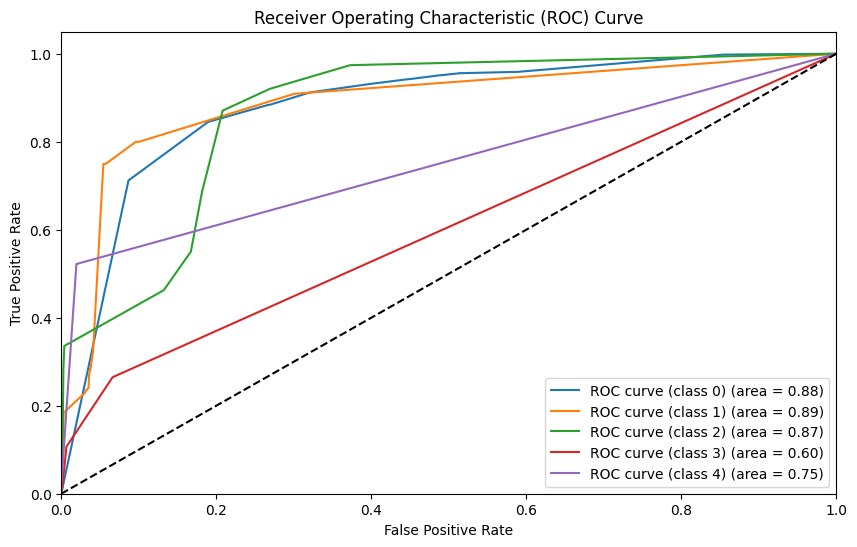

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve for each class
Y_probs = clf_rf.predict_proba(X_test2)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(Y_probs[0])):
    fpr[i], tpr[i], _ = roc_curve((Y_test == i).astype(int), Y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(Y_probs[0])):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN=KNeighborsClassifier()
clf_KNN.fit(X_rfe, Y.astype(int))

KNeighborsClassifier()

In [42]:
Y_pred2=clf_KNN.predict(X_test2)
# Create confusion matrix
pd.crosstab(Y_test, Y_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1,2,3
Actual attacks,,,,
0,9068,497,142,4
1,1552,5792,105,11
2,980,199,1242,0
3,2613,15,136,121
4,60,0,3,4


In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute metrics with appropriate averaging
accuracy = cross_val_score(clf_KNN, X_test2, Y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

precision = cross_val_score(clf_KNN, X_test2, Y_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(clf_KNN, X_test2, Y_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

f1 = cross_val_score(clf_KNN, X_test2, Y_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f1.mean(), f1.std() * 2))


Accuracy: 0.95737 (+/- 0.00875)


C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.88149 (+/- 0.15987)
Recall: 0.79861 (+/- 0.05992)
F-measure: 0.81306 (+/- 0.07785)


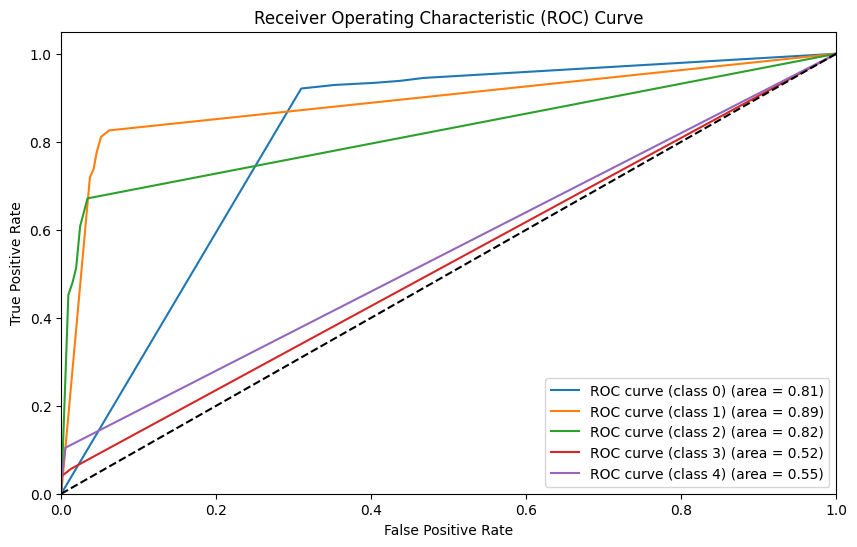

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve for each class
Y_probs = clf_KNN.predict_proba(X_test2)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(Y_probs[0])):
    fpr[i], tpr[i], _ = roc_curve((Y_test == i).astype(int), Y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(Y_probs[0])):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [45]:
from sklearn.svm import SVC

clf_SVM=SVC(kernel='linear', C=1.0, random_state=0)

In [46]:
clf_SVM.fit(X_rfe, Y.astype(int))

SVC(kernel='linear', random_state=0)

In [47]:
Y_pred2=clf_SVM.predict(X_test2)

# Create confusion matrix
pd.crosstab(Y_test, Y_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1,2,3
Actual attacks,,,,
0,9012,488,203,8
1,1733,5692,35,0
2,429,252,1682,58
3,2584,8,289,4
4,59,2,4,2


In [48]:
Y_pred2

array([1, 1, 0, ..., 0, 0, 2])

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred2)

print("Accuracy:", accuracy)
# Calculate precision
precision = precision_score(Y_test, Y_pred2, average='weighted')
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred2, average='weighted')

print("Recall:", recall)
f1 = f1_score(Y_test, Y_pred2, average='weighted')

print("F1-score:", f1)

Accuracy: 0.7270227111426544
Precision: 0.6620720611652413
Recall: 0.7270227111426544
F1-score: 0.6792661806273551


C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.65      0.93      0.77      9711
           1       0.88      0.76      0.82      7460
           2       0.76      0.69      0.73      2421
           3       0.06      0.00      0.00      2885
           4       0.00      0.00      0.00        67

    accuracy                           0.73     22544
   macro avg       0.47      0.48      0.46     22544
weighted avg       0.66      0.73      0.68     22544



C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

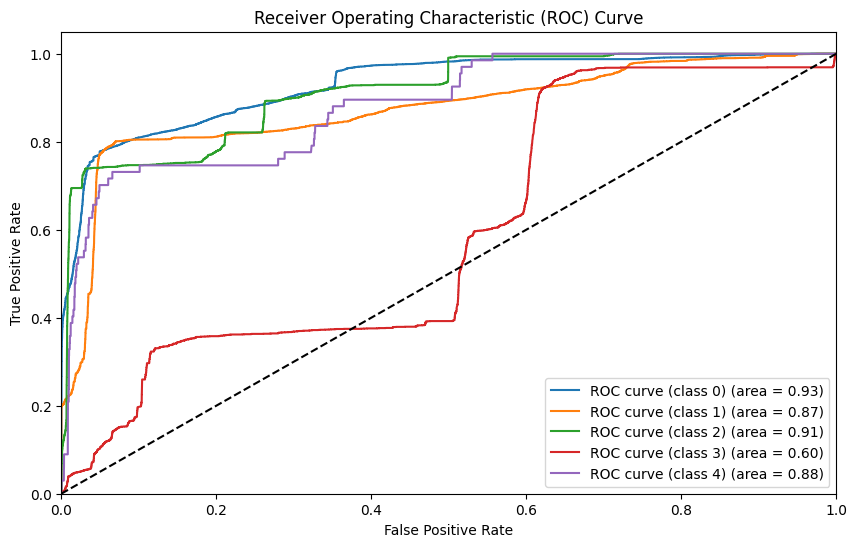

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the SVM classifier

# Predict probabilities for each class
Y_probs = clf_SVM.decision_function(X_test2)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(Y_probs[0])):
    fpr[i], tpr[i], _ = roc_curve((Y_test == i).astype(int), Y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(Y_probs[0])):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.naive_bayes import GaussianNB

# Create Gaussian Naive Bayes classifiers
clf_NB = GaussianNB()

In [53]:
clf_NB.fit(X_rfe, Y.astype(int))

GaussianNB()

In [54]:
Y_pred2 = clf_NB.predict(X_test2)
pd.crosstab(Y_test, Y_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1,2,3
Actual attacks,,,,
0,8768,493,447,3
1,1561,5713,186,0
2,139,214,2068,0
3,2274,76,535,0
4,51,8,8,0


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred2)

print("Accuracy:", accuracy)
# Calculate precision
precision = precision_score(Y_test, Y_pred2, average='weighted')
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred2, average='weighted')

print("Recall:", recall)
f1 = f1_score(Y_test, Y_pred2, average='weighted')

print("F1-score:", f1)

Accuracy: 0.7340755855216465
Precision: 0.6543540946354791
Recall: 0.7340755855216465
F1-score: 0.684833188341952


C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78      9711
           1       0.88      0.77      0.82      7460
           2       0.64      0.85      0.73      2421
           3       0.00      0.00      0.00      2885
           4       0.00      0.00      0.00        67

    accuracy                           0.73     22544
   macro avg       0.44      0.50      0.47     22544
weighted avg       0.65      0.73      0.68     22544



C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

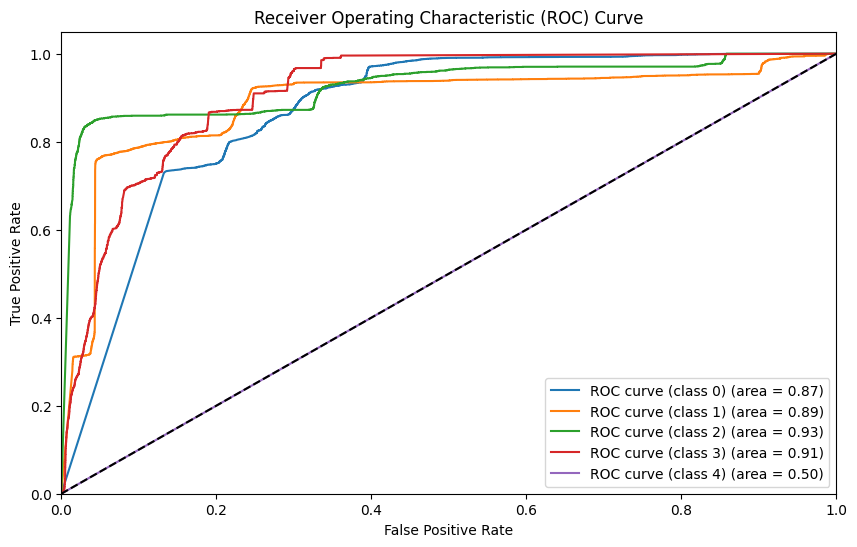

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Instantiate and fit the Naive Bayes classifier


# Predict probabilities for each class
Y_probs = clf_NB.predict_proba(X_test2)

# Binarize the labels
y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(Y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], Y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [58]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression classifiers
clf_LR = LogisticRegression(random_state=0, max_iter=1000)

In [59]:
clf_LR.fit(X_rfe, Y.astype(int))

LogisticRegression(max_iter=1000, random_state=0)

In [60]:
Y_pred2 = clf_LR.predict(X_test2)
pd.crosstab(Y_test, Y_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1,2,3
Actual attacks,,,,
0,8886,593,219,13
1,1478,5933,49,0
2,390,241,1790,0
3,2425,139,315,6
4,45,15,6,1


In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute metrics with appropriate averaging
accuracy = cross_val_score(clf_LR, X_test2, Y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

precision = cross_val_score(clf_LR, X_test2, Y_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(clf_LR, X_test2, Y_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

f1 = cross_val_score(clf_LR, X_test2, Y_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f1.mean(), f1.std() * 2))

Accuracy: 0.87851 (+/- 0.01391)


C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.71914 (+/- 0.13732)
Recall: 0.69843 (+/- 0.03712)
F-measure: 0.70040 (+/- 0.05123)


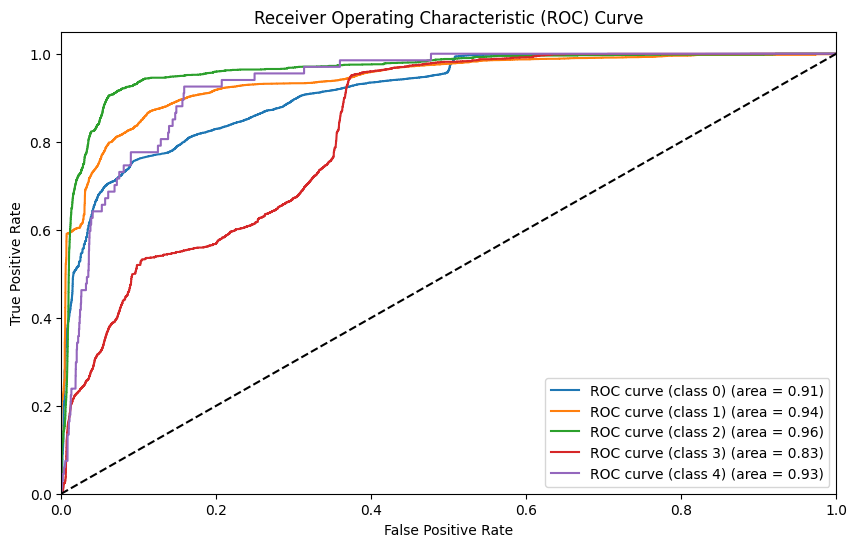

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the Logistic Regression classifier

# Predict probabilities for each class
Y_probs = clf_LR.predict_proba(X_test2)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(Y_probs[0])):
    fpr[i], tpr[i], _ = roc_curve((Y_test == i).astype(int), Y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(Y_probs[0])):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [63]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Initialize classifiers with probability=True
clf_SVM = SVC(probability=True)
clf_NB = GaussianNB()
clf_LR = LogisticRegression(random_state=0, max_iter=1000)

In [65]:
clf_voting = VotingClassifier(estimators=[
    ('Rf', clf_rf),
    ('Knn', clf_KNN),
    ('Svm', clf_SVM),
    ('NB', clf_NB),
    ('LR', clf_LR)
], voting='soft')

# Fit the VotingClassifier
clf_voting.fit(X_rfe, Y.astype(int))

VotingClassifier(estimators=[('Rf',
                              RandomForestClassifier(n_estimators=10,
                                                     n_jobs=1)),
                             ('Knn', KNeighborsClassifier()),
                             ('Svm', SVC(probability=True)),
                             ('NB', GaussianNB()),
                             ('LR',
                              LogisticRegression(max_iter=1000,
                                                 random_state=0))],
                 voting='soft')

In [66]:
import pickle as pkl
pkl.dump(clf_voting,open("finalpro.p","wb"))

In [69]:
l=pkl.load(open("finalpro.p","rb"))
# [8, 27, 30, 36, 19, 31, 32, 26, 28, 33, 21, 35, 23, 24, 29, 37, 6, 22, 34, 25]
input=(0,0,0.04,1,229,0.06,0,0.06,255,0,0,0,1,1,10,1,0,0,0,0.04,0)
i=np.asarray(input)
i1=i.reshape(1,-1)
prediction=l.predict(i1)

In [70]:
prediction

array([1])

In [71]:
# Predict using the VotingClassifier
Y_pred_voting = clf_voting.predict(X_test2)

# Create confusion matrix
confusion_matrix_voting = pd.crosstab(Y_test, Y_pred_voting, rownames=['Actual attacks'], colnames=['Predicted attacks'])

# Print the confusion matrix
print(confusion_matrix_voting)

Predicted attacks     0     1     2  3
Actual attacks                        
0                  9011   475   225  0
1                  1865  5533    62  0
2                   421   166  1834  0
3                  2557     4   323  1
4                    64     0     3  0


In [73]:
import numpy as np

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Example:
# y_true = [0, 1, 1, 0, 1]
# y_pred = [0, 1, 0, 0, 1]

# Convert lists to numpy arrays for easier manipulation
y_true = np.array(Y_test)
y_pred = np.array(Y_pred2)

# Find the indices where true positive predictions occur
tp_indices = np.where((y_true == 1) & (y_pred == 1))[0]

print("Indices of True Positive Predictions:", tp_indices)

# If you want to extract the corresponding rows from your dataset, assuming your dataset is a numpy array named 'data':
tp_rows = df.iloc[tp_indices]

print("Rows corresponding to True Positive Predictions:")
print(tp_rows)

Indices of True Positive Predictions: [    0     1    12 ... 22531 22534 22536]
Rows corresponding to True Positive Predictions:
       duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0             0        491          0     0               0       0    0   
1             0        146          0     0               0       0    0   
12            0        287       2251     0               0       0    0   
13            0        334          0     0               0       0    0   
19            0        343       1178     0               0       0    0   
...         ...        ...        ...   ...             ...     ...  ...   
22515         0          0          0     0               0       0    0   
22530         0          0          0     0               0       0    0   
22531         0          0          0     0               0       0    0   
22534         0          0          0     0               0       0    0   
22536         0          0         

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute metrics with appropriate averaging
accuracy = cross_val_score(clf_voting, X_test2, Y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

precision = cross_val_score(clf_voting, X_test2, Y_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(clf_voting, X_test2, Y_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

f1 = cross_val_score(clf_voting, X_test2, Y_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f1.mean(), f1.std() * 2))

Accuracy: 0.96190 (+/- 0.00726)
Precision: 0.86228 (+/- 0.12676)
Recall: 0.83153 (+/- 0.07249)
F-measure: 0.83575 (+/- 0.07716)


In [75]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.92      0.77      9711
           1       0.86      0.80      0.83      7460
           2       0.75      0.74      0.75      2421
           3       0.30      0.00      0.00      2885
           4       0.00      0.00      0.00        67

    accuracy                           0.74     22544
   macro avg       0.52      0.49      0.47     22544
weighted avg       0.69      0.74      0.69     22544



C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DHANUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

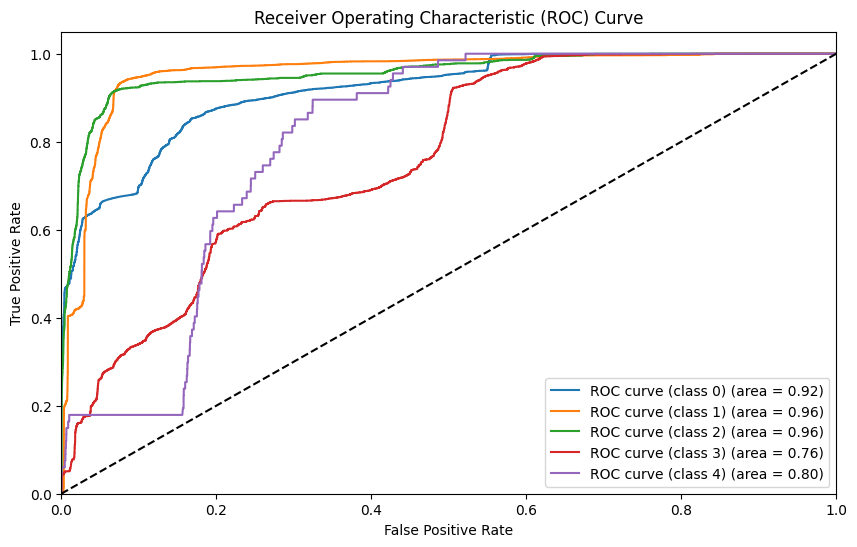

In [76]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Predict probabilities for each class
Y_probs_voting = clf_voting.predict_proba(X_test2)

# Binarize the labels
y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(Y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], Y_probs_voting[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()